# Load All libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score



from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Load the data set

In [2]:
# Load a dataset into a Pandas Dataframe
train_df = pd.read_csv('./spaceship-titanic/CS559_S23_Competition_Data/train_.csv')
val_df = pd.read_csv('./spaceship-titanic/CS559_S23_Competition_Data/validation_.csv')
test_df = pd.read_csv('./spaceship-titanic/CS559_S23_Competition_Data/test_.csv')
print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (6258, 15)
Full test dataset shape is (1739, 15)


# EDA 

In [3]:
# Display the first 5 examples
train_df.head(5)

Unnamed: 0 PassengerId HomePlanet CryoSleep    Cabin  Destination   Age  \
0           0     3856_01      Earth     False  F/726/S          NaN 23.00   
1           1     6110_01      Earth     False  E/389/P  55 Cancri e 57.00   
2           2     6908_01     Europa     False  C/254/S  TRAPPIST-1e 60.00   
3           3     5628_01      Earth      True  G/900/P  TRAPPIST-1e 27.00   
4           4     1193_02     Europa      True   B/50/S  55 Cancri e 25.00   

     VIP  RoomService  FoodCourt  ShoppingMall    Spa   VRDeck  \
0  False       339.00     754.00          7.00   0.00     0.00   
1  False         0.00       0.00          0.00   0.00   642.00   
2  False         0.00     960.00         46.00 854.00 17074.00   
3  False         0.00       0.00          0.00   0.00     0.00   
4  False         0.00       0.00          0.00   0.00     0.00   

              Name  Transported  
0   Ward Alvasquez         True  
1  Sus Warrishales         True  
2  Sheleon Swinvul        False  
3  Ebonya Potthews        False  
4   Solam Presstic         True

In [4]:
val_df.head(5)

Unnamed: 0 PassengerId HomePlanet CryoSleep     Cabin    Destination   Age  \
0           0     7464_01      Earth      True  G/1207/P    TRAPPIST-1e 11.00   
1           1     2338_02      Earth     False   F/474/P    TRAPPIST-1e 26.00   
2           2     3134_01     Europa     False   C/119/S  PSO J318.5-22 62.00   
3           3     7442_01      Earth     False   E/495/S    TRAPPIST-1e 43.00   
4           4     2374_01       Mars     False   E/166/S    TRAPPIST-1e 20.00   

     VIP  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  \
0  False         0.00       0.00          0.00   0.00    0.00   
1  False        14.00       0.00          0.00 857.00    0.00   
2   True         0.00    4513.00          0.00  85.00 1437.00   
3  False        20.00       0.00        726.00    NaN    0.00   
4  False       464.00       0.00       1432.00   0.00    0.00   

               Name  Transported  
0    Lynnie Hickett         True  
1    Julion Moodman        False  
2   Enifik Clughted         True  
3  Antony Morrencis        False  
4        Gers Sames         True

In [5]:
test_df.head(5)

Unnamed: 0 PassengerId HomePlanet CryoSleep    Cabin    Destination   Age  \
0           0     8609_01      Earth     False  E/564/S    TRAPPIST-1e 27.00   
1           1     0073_01       Mars     False    D/3/P  PSO J318.5-22 37.00   
2           2     9069_01     Europa      True  B/297/P    TRAPPIST-1e 22.00   
3           3     5619_01      Earth      True  G/908/S    55 Cancri e 28.00   
4           4     0941_01      Earth     False  F/195/P    TRAPPIST-1e 13.00   

     VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  False         0.00       0.00          2.00  994.00    0.00   
1  False        46.00      83.00        738.00    0.00   12.00   
2  False         0.00       0.00          0.00    0.00    0.00   
3  False         0.00       0.00          0.00    0.00    0.00   
4  False         0.00       7.00          0.00 1175.00    0.00   

                 Name  Transported  
0     Bara Cochrisons        False  
1           Gorn Make        False  
2       Azhat Brakeng         True  
3        Gordo Freder         True  
4  Carita Steeletters        False

In [6]:
train_df.describe()

Unnamed: 0     Age  RoomService  FoodCourt  ShoppingMall      Spa  \
count     6258.00 6128.00      6132.00    6132.00       6107.00  6140.00   
mean      3128.50   28.77       229.00     455.55        175.93   306.63   
std       1806.67   14.51       686.85    1594.71        621.13  1105.12   
min          0.00    0.00         0.00       0.00          0.00     0.00   
25%       1564.25   19.00         0.00       0.00          0.00     0.00   
50%       3128.50   27.00         0.00       0.00          0.00     0.00   
75%       4692.75   38.00        51.00      70.25         28.00    58.00   
max       6257.00   79.00     14327.00   29813.00      23492.00 18572.00   

        VRDeck  
count  6129.00  
mean    299.69  
std    1134.90  
min       0.00  
25%       0.00  
50%       0.00  
75%      42.00  
max   20336.00

In [7]:
val_df.describe()

Unnamed: 0    Age  RoomService  FoodCourt  ShoppingMall      Spa  \
count      696.00 681.00       686.00     685.00        680.00   673.00   
mean       347.50  29.54       232.64     580.98        153.88   289.74   
std        201.06  14.86       696.43    2195.56        482.55  1319.70   
min          0.00   0.00         0.00       0.00          0.00     0.00   
25%        173.75  20.00         0.00       0.00          0.00     0.00   
50%        347.50  27.00         0.00       0.00          0.00     0.00   
75%        521.25  39.00        40.50     106.00         10.00    73.00   
max        695.00  79.00      9920.00   27723.00       6124.00 22408.00   

        VRDeck  
count   681.00  
mean    315.81  
std    1325.67  
min       0.00  
25%       0.00  
50%       0.00  
75%      75.00  
max   24133.00

In [8]:
test_df.describe()

Unnamed: 0     Age  RoomService  FoodCourt  ShoppingMall      Spa  \
count     1739.00 1705.00      1694.00    1693.00       1698.00  1697.00   
mean       869.00   28.76       205.85     417.51        173.76   335.96   
std        502.15   14.27       574.02    1374.11        588.71  1170.88   
min          0.00    0.00         0.00       0.00          0.00     0.00   
25%        434.50   20.00         0.00       0.00          0.00     0.00   
50%        869.00   27.00         0.00       0.00          0.00     0.00   
75%       1303.50   38.00        35.00      85.00         33.00    61.00   
max       1738.00   76.00      8030.00   16521.00      10705.00 16594.00   

        VRDeck  
count  1695.00  
mean    319.14  
std    1106.60  
min       0.00  
25%       0.00  
50%       0.00  
75%      52.00  
max   16337.00

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6258 entries, 0 to 6257
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6258 non-null   int64  
 1   PassengerId   6258 non-null   object 
 2   HomePlanet    6116 non-null   object 
 3   CryoSleep     6102 non-null   object 
 4   Cabin         6114 non-null   object 
 5   Destination   6136 non-null   object 
 6   Age           6128 non-null   float64
 7   VIP           6106 non-null   object 
 8   RoomService   6132 non-null   float64
 9   FoodCourt     6132 non-null   float64
 10  ShoppingMall  6107 non-null   float64
 11  Spa           6140 non-null   float64
 12  VRDeck        6129 non-null   float64
 13  Name          6113 non-null   object 
 14  Transported   6258 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 690.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1739 non-null   int64  
 1   PassengerId   1739 non-null   object 
 2   HomePlanet    1699 non-null   object 
 3   CryoSleep     1694 non-null   object 
 4   Cabin         1697 non-null   object 
 5   Destination   1698 non-null   object 
 6   Age           1705 non-null   float64
 7   VIP           1696 non-null   object 
 8   RoomService   1694 non-null   float64
 9   FoodCourt     1693 non-null   float64
 10  ShoppingMall  1698 non-null   float64
 11  Spa           1697 non-null   float64
 12  VRDeck        1695 non-null   float64
 13  Name          1700 non-null   object 
 14  Transported   1739 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 192.0+ KB


<Axes: >

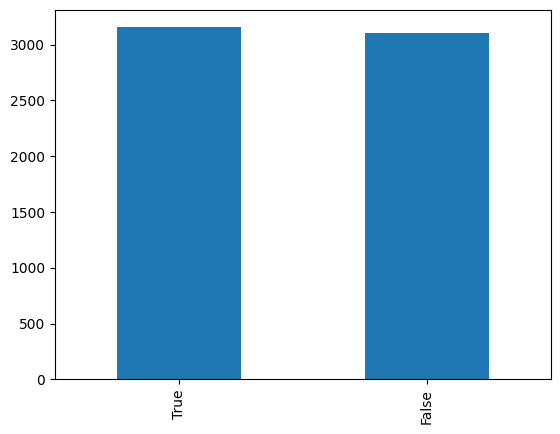

In [11]:
plot_df = train_df.Transported.value_counts()
plot_df.plot(kind="bar")

In [12]:
# fig, ax = plt.subplots(5,1,  figsize=(10, 10))
# plt.subplots_adjust(top = 2)

# sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0])
# sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1])
# sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
# sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3])
# sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4])

In [13]:
# check for null values
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       156
VIP             152
ShoppingMall    151
Name            145
Cabin           144
HomePlanet      142
Age             130
VRDeck          129
RoomService     126
FoodCourt       126
Destination     122
Spa             118
Unnamed: 0        0
PassengerId       0
Transported       0
dtype: int64

In [14]:
# check for null values
val_df.isnull().sum().sort_values(ascending=False)

Spa             23
HomePlanet      19
Destination     19
CryoSleep       16
ShoppingMall    16
Name            16
Age             15
VRDeck          15
Cabin           13
FoodCourt       11
RoomService     10
VIP              8
Unnamed: 0       0
PassengerId      0
Transported      0
dtype: int64

In [15]:
# check for null values
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       46
CryoSleep       45
RoomService     45
VRDeck          44
VIP             43
Cabin           42
Spa             42
Destination     41
ShoppingMall    41
HomePlanet      40
Name            39
Age             34
Unnamed: 0       0
PassengerId      0
Transported      0
dtype: int64

In [16]:
print("Train unique values: \n",train_df.nunique() )

Train unique values: 
 Unnamed: 0      6258
PassengerId     6258
HomePlanet         3
CryoSleep          2
Cabin           4988
Destination        3
Age               79
VIP                2
RoomService     1050
FoodCourt       1187
ShoppingMall     916
Spa             1075
VRDeck          1052
Name            6102
Transported        2
dtype: int64


In [17]:
print("validation unique values: \n",val_df.nunique() )

validation unique values: 
 Unnamed: 0      696
PassengerId     696
HomePlanet        3
CryoSleep         2
Cabin           661
Destination       3
Age              70
VIP               2
RoomService     189
FoodCourt       210
ShoppingMall    162
Spa             201
VRDeck          196
Name            680
Transported       2
dtype: int64


In [18]:
print("test unique values: \n",test_df.nunique() )

test unique values: 
 Unnamed: 0      1739
PassengerId     1739
HomePlanet         3
CryoSleep          2
Cabin           1574
Destination        3
Age               74
VIP                2
RoomService      388
FoodCourt        440
ShoppingMall     383
Spa              418
VRDeck           423
Name            1699
Transported        2
dtype: int64


In [19]:
print("Train distinct values: \n",train_df['HomePlanet'].unique())

Train distinct values: 
 ['Earth' 'Europa' nan 'Mars']


In [20]:
print("validation distinct values: \n",val_df['HomePlanet'].unique())

validation distinct values: 
 ['Earth' 'Europa' 'Mars' nan]


In [21]:
print("test distinct values: \n",test_df['HomePlanet'].unique())

test distinct values: 
 ['Earth' 'Mars' 'Europa' nan]


In [22]:
# List of unique values 'Destination'
print("Train distinct values: \n",train_df['Destination'].unique())

Train distinct values: 
 [nan '55 Cancri e' 'TRAPPIST-1e' 'PSO J318.5-22']


In [23]:
# List of unique values 'Destination'
print("validation distinct values: \n",val_df['Destination'].unique())

validation distinct values: 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [24]:
# List of unique values 'Destination'
print("test distinct values: \n",test_df['Destination'].unique())

test distinct values: 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [25]:
# Check for duplicate Ids
# Train
idsUnique = len(set(train_df.PassengerId))
idsTotal = train_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Train: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Train: There are 0 duplicate IDs for 6258 total entries


In [26]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
train = train_df.drop(['PassengerId', 'Name'], axis=1)
train.head(5)

Unnamed: 0 HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
0           0      Earth     False  F/726/S          NaN 23.00  False   
1           1      Earth     False  E/389/P  55 Cancri e 57.00  False   
2           2     Europa     False  C/254/S  TRAPPIST-1e 60.00  False   
3           3      Earth      True  G/900/P  TRAPPIST-1e 27.00  False   
4           4     Europa      True   B/50/S  55 Cancri e 25.00  False   

   RoomService  FoodCourt  ShoppingMall    Spa   VRDeck  Transported  
0       339.00     754.00          7.00   0.00     0.00         True  
1         0.00       0.00          0.00   0.00   642.00         True  
2         0.00     960.00         46.00 854.00 17074.00        False  
3         0.00       0.00          0.00   0.00     0.00        False  
4         0.00       0.00          0.00   0.00     0.00         True

In [27]:
# Check for duplicate Ids
# validation
idsUnique = len(set(val_df.PassengerId))
idsTotal = val_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Validation: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Validation: There are 0 duplicate IDs for 696 total entries


In [28]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
val = val_df.drop(['PassengerId', 'Name'], axis=1)
val.head(5)

Unnamed: 0 HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0           0      Earth      True  G/1207/P    TRAPPIST-1e 11.00  False   
1           1      Earth     False   F/474/P    TRAPPIST-1e 26.00  False   
2           2     Europa     False   C/119/S  PSO J318.5-22 62.00   True   
3           3      Earth     False   E/495/S    TRAPPIST-1e 43.00  False   
4           4       Mars     False   E/166/S    TRAPPIST-1e 20.00  False   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  Transported  
0         0.00       0.00          0.00   0.00    0.00         True  
1        14.00       0.00          0.00 857.00    0.00        False  
2         0.00    4513.00          0.00  85.00 1437.00         True  
3        20.00       0.00        726.00    NaN    0.00        False  
4       464.00       0.00       1432.00   0.00    0.00         True

In [29]:
# Test
idsUnique = len(set(test_df.PassengerId))
idsTotal = test_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Test: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Test: There are 0 duplicate IDs for 1739 total entries


In [30]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
test = test_df.drop(['PassengerId', 'Name'], axis=1)
test.head(5)

Unnamed: 0 HomePlanet CryoSleep    Cabin    Destination   Age    VIP  \
0           0      Earth     False  E/564/S    TRAPPIST-1e 27.00  False   
1           1       Mars     False    D/3/P  PSO J318.5-22 37.00  False   
2           2     Europa      True  B/297/P    TRAPPIST-1e 22.00  False   
3           3      Earth      True  G/908/S    55 Cancri e 28.00  False   
4           4      Earth     False  F/195/P    TRAPPIST-1e 13.00  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0         0.00       0.00          2.00  994.00    0.00        False  
1        46.00      83.00        738.00    0.00   12.00        False  
2         0.00       0.00          0.00    0.00    0.00         True  
3         0.00       0.00          0.00    0.00    0.00         True  
4         0.00       7.00          0.00 1175.00    0.00        False

In [31]:
# Check for missing values
# Train
train_missing_val_count = (train.isnull().sum())
#validation
val_missing_val_count = (val.isnull().sum())
# Test
test_missing_val_count = (test.isnull().sum())
print("Train missing values: \n",train_missing_val_count[train_missing_val_count>0],"\n\n","Test missing values: \n",  test_missing_val_count[test_missing_val_count>0],"\n\n","Validation missing values: \n",  val_missing_val_count[val_missing_val_count>0])

Train missing values: 
 HomePlanet      142
CryoSleep       156
Cabin           144
Destination     122
Age             130
VIP             152
RoomService     126
FoodCourt       126
ShoppingMall    151
Spa             118
VRDeck          129
dtype: int64 

 Test missing values: 
 HomePlanet      40
CryoSleep       45
Cabin           42
Destination     41
Age             34
VIP             43
RoomService     45
FoodCourt       46
ShoppingMall    41
Spa             42
VRDeck          44
dtype: int64 

 Validation missing values: 
 HomePlanet      19
CryoSleep       16
Cabin           13
Destination     19
Age             15
VIP              8
RoomService     10
FoodCourt       11
ShoppingMall    16
Spa             23
VRDeck          15
dtype: int64


# Preprocessing

In [32]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
val[imputer_cols] = imputer.transform(val[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

In [33]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,val,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        val[col] = val[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        val[col] = LabelEncoder().fit_transform(val[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, val,test

train ,val,test = label_encoder(train,val,test ,label_cols)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6258 entries, 0 to 6257
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6258 non-null   int64  
 1   HomePlanet    6258 non-null   int32  
 2   CryoSleep     6258 non-null   int32  
 3   Cabin         6258 non-null   int32  
 4   Destination   6258 non-null   int32  
 5   Age           6258 non-null   float64
 6   VIP           6258 non-null   int32  
 7   RoomService   6258 non-null   float64
 8   FoodCourt     6258 non-null   float64
 9   ShoppingMall  6258 non-null   float64
 10  Spa           6258 non-null   float64
 11  VRDeck        6258 non-null   float64
 12  Transported   6258 non-null   bool   
dtypes: bool(1), float64(6), int32(5), int64(1)
memory usage: 470.7 KB


In [35]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    696 non-null    int64  
 1   HomePlanet    696 non-null    int32  
 2   CryoSleep     696 non-null    int32  
 3   Cabin         696 non-null    int32  
 4   Destination   696 non-null    int32  
 5   Age           696 non-null    float64
 6   VIP           696 non-null    int32  
 7   RoomService   696 non-null    float64
 8   FoodCourt     696 non-null    float64
 9   ShoppingMall  696 non-null    float64
 10  Spa           696 non-null    float64
 11  VRDeck        696 non-null    float64
 12  Transported   696 non-null    bool   
dtypes: bool(1), float64(6), int32(5), int64(1)
memory usage: 52.5 KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1739 non-null   int64  
 1   HomePlanet    1739 non-null   int32  
 2   CryoSleep     1739 non-null   int32  
 3   Cabin         1739 non-null   int32  
 4   Destination   1739 non-null   int32  
 5   Age           1739 non-null   float64
 6   VIP           1739 non-null   int32  
 7   RoomService   1739 non-null   float64
 8   FoodCourt     1739 non-null   float64
 9   ShoppingMall  1739 non-null   float64
 10  Spa           1739 non-null   float64
 11  VRDeck        1739 non-null   float64
 12  Transported   1739 non-null   bool   
dtypes: bool(1), float64(6), int32(5), int64(1)
memory usage: 130.9 KB


# splitting training data 

In [37]:
train.drop(["Cabin"] , axis = 1 ,inplace = True)
val.drop(["Cabin"] , axis = 1 ,inplace = True)
test.drop(["Cabin"] , axis = 1 ,inplace = True)
X_train = train.drop("Transported" , axis =1 )
y_train = train["Transported"]

X_val = val.drop("Transported" , axis =1 )
y_val = val["Transported"]

X_test = val.drop("Transported" , axis =1 )
y_test = val["Transported"]


# creating models and using grid search CV on all to get best models 

In [38]:
# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=None,
#                      predictions=False,
#                      random_state=0,
#                      classifiers='all')

# models, predictions = clf.fit(X_train , X_val , y_train , y_val)

In [39]:
# models[:15]

In [40]:
xgb = XGBClassifier(booster='gbtree', tree_method='gpu_hist', gpu_id=0,nthread=6,learning_rate= 0.01, max_depth= 6, n_estimators= 400)
# param_grid = {
#      'max_depth': [6,7,8,9,10,12],
#     'n_estimators': [200, 300,400],
#     'learning_rate': [0.01, 0.05,0.02,0.03],
# }

# scoring = ['f1']
# # Set up the k-fold cross-validation
        
# grid_search = GridSearchCV(estimator=xgb, 
#                    param_grid=param_grid, 
#                    scoring=scoring, 
#                    refit='f1', 
#                    n_jobs=6, 
#                    cv=3, 
#                    verbose=3,
                
#                           )
# # Fit grid search
# grid_search.fit(X_train, y_train)
# xgb_best_model = grid_search.best_estimator_
xgb.fit(X_train, y_train)
xgb_best_model = xgb

In [41]:
# print("best params", grid_search.best_params_)
# best params {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}

In [42]:
xgb_pred = xgb_best_model.predict(X_val)
accuracy = round(accuracy_score(y_val, xgb_pred), 3)
precision = round(precision_score(y_val, xgb_pred), 3)
recall = round(recall_score(y_val, xgb_pred), 3)
f1 = round(f1_score(y_val, xgb_pred, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(accuracy,precision,recall,f1))

-- Accuracy: 0.797 / Precision: 0.785 / Recall: 0.827 / f1: 0.797


In [43]:
# Define your six base models
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = LinearDiscriminantAnalysis()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()
model6 = GradientBoostingClassifier()

# Train the base models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# Use the base models to make predictions on the validation set
preds1 = model1.predict(X_val)
preds2 = model2.predict(X_val)
preds3 = model3.predict(X_val)
preds4 = model4.predict(X_val)
preds5 = model5.predict(X_val)
preds6 = model6.predict(X_val)

# Combine the predictions into a new dataset
meta_X = np.column_stack((preds1, preds2, preds3, preds4, preds5, preds6))

# Define the meta-model (logistic regression in this case)
meta_model = LogisticRegression()

# Train the meta-model on the combined predictions
meta_model.fit(meta_X, y_val)

# Use the base models to make predictions on the entire dataset
base_preds1 = model1.predict(X_test)
base_preds2 = model2.predict(X_test)
base_preds3 = model3.predict(X_test)
base_preds4 = model4.predict(X_test)
base_preds5 = model5.predict(X_test)
base_preds6 = model6.predict(X_test)

# Combine the base model predictions into a new dataset
meta_X_test = np.column_stack((base_preds1, base_preds2, base_preds3, base_preds4, base_preds5, base_preds6))

# Use the meta-model to make predictions on the test set
meta_preds = meta_model.predict(meta_X_test)



In [44]:

accuracy = round(accuracy_score(y_test, meta_preds), 3)
precision = round(precision_score(y_test, meta_preds), 3)
recall = round(recall_score(y_test, meta_preds), 3)
f1 = round(f1_score(y_test, meta_preds, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(accuracy,precision,recall,f1))

-- Accuracy: 0.792 / Precision: 0.78 / Recall: 0.822 / f1: 0.791


In [45]:

# stacking_clf = StackingClassifier(
#     estimators=[
#         ('lr', model1),
#         ('gnb', model2),
#         ('lda', model3),
#         ('dt', model4),
#         ('rf', model5),
#         ('gb', model6)
#     ],
#     final_estimator=LogisticRegression(),
#     cv=5,
#     stack_method='auto',
#     n_jobs=-1
# )
# # Get validation set predictions from the meta model
# val_preds_meta_model = stacking_clf.predict(meta_X)

# # Evaluate the meta model on validation set
# accuracy = accuracy_score(y_val, val_preds_meta_model)
# print(f"Accuracy of meta model on validation set: {accuracy:.3f}")


# test_preds_meta_model = stacking_clf.predict(meta_X_test)

# # Evaluate the meta model on validation set
# accuracy = accuracy_score(y_test, test_preds_meta_model)
# print(f"Accuracy of meta model on validation set: {accuracy:.3f}")

In [46]:
# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define the meta model
meta_model = LogisticRegression(random_state=42)

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = stacking_clf.predict(X_val)

# Evaluate the accuracy of the model
accuracy = stacking_clf.score(X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.7729885057471264


In [53]:
# Make predictions on the testing data
y_pred = stacking_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = stacking_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7729885057471264


## Logistic regression

In [47]:


logReg_accuracy = round(accuracy_score(y_val, preds1), 3)
logReg_precision = round(precision_score(y_val, preds1), 3)
logReg_recall = round(recall_score(y_val, preds1), 3)
logReg_f1 = round(f1_score(y_val, preds1, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(logReg_accuracy,logReg_precision,logReg_recall,logReg_f1))

-- Accuracy: 0.784 / Precision: 0.771 / Recall: 0.819 / f1: 0.784


## GaussianNB

In [48]:



gauss_accuracy = round(accuracy_score(y_val, preds2), 3)
gauss_precision = round(precision_score(y_val, preds2), 3)
gauss_recall = round(recall_score(y_val, preds2), 3)
gauss_f1 = round(f1_score(y_val, preds2, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(gauss_accuracy,gauss_precision,gauss_recall,gauss_f1))


-- Accuracy: 0.687 / Precision: 0.63 / Recall: 0.926 / f1: 0.665


## LinearDiscriminantAnalysis

In [49]:


lda_accuracy = round(accuracy_score(y_val, preds3), 3)
lda_precision = round(precision_score(y_val, preds3), 3)
lda_recall = round(recall_score(y_val, preds3), 3)
lda_f1 = round(f1_score(y_val, preds3, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(lda_accuracy,lda_precision,lda_recall,lda_f1))


-- Accuracy: 0.756 / Precision: 0.782 / Recall: 0.72 / f1: 0.756


## DecisionTreeClassifier

In [50]:

dtc_accuracy = round(accuracy_score(y_val, preds4), 3)
dtc_precision = round(precision_score(y_val, preds4), 3)
dtc_recall = round(recall_score(y_val, preds4), 3)
dtc_f1 = round(f1_score(y_val, preds4, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(dtc_accuracy,dtc_precision,dtc_recall,dtc_f1))


-- Accuracy: 0.67 / Precision: 0.675 / Recall: 0.671 / f1: 0.669


## RandomForestClassifier

In [51]:

rfc_accuracy = round(accuracy_score(y_val, preds5), 3)
rfc_precision = round(precision_score(y_val, preds5), 3)
rfc_recall = round(recall_score(y_val, preds5), 3)
rfc_f1 = round(f1_score(y_val, preds5, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(rfc_accuracy,rfc_precision,rfc_recall,rfc_f1))


-- Accuracy: 0.774 / Precision: 0.81 / Recall: 0.725 / f1: 0.774


## GradientBoostingClassifier

In [52]:

gbc_accuracy = round(accuracy_score(y_val, preds6), 3)
gbc_precision = round(precision_score(y_val, preds6), 3)
gbc_recall = round(recall_score(y_val, preds6), 3)
gbc_f1 = round(f1_score(y_val, preds6, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(gbc_accuracy,gbc_precision,gbc_recall,gbc_f1))


-- Accuracy: 0.79 / Precision: 0.773 / Recall: 0.83 / f1: 0.79
